In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('data/ds_salaries.csv', 'r') as f:
    df = pd.read_csv(f, index_col=0)
df.index.name = 'No.'
df = df.drop(['salary', 'salary_currency', 'employee_residence'], axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
No.,,,,,,,,
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L


In [3]:
with open('data/scores.csv', 'r') as f:
    scores = pd.read_csv(f, index_col=0)

scores.head()

,score_2020,score_2021,score_2022,economy_2020,economy_2021,economy_2022
country,,,,,,
CH,7.4406,7.417,7.3934,1.473259,1.473624,1.473989
IS,7.4690,7.455,7.4410,1.408033,1.415203,1.422373
DK,7.5985,7.616,7.6335,1.404007,1.406433,1.408859
NO,7.5890,7.605,7.6210,1.500349,1.494005,1.487661
CA,7.2384,7.201,7.1636,1.378310,1.375037,1.371764


In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np
cols = ['score_2020', 'score_2021', 'score_2022', 'economy_2020', 'economy_2021', 'economy_2022']
sc = scores[cols]

scaler = StandardScaler()
sc[cols] = scaler.fit_transform(sc[cols])

scores[cols] = sc[cols]
scores.head()

,score_2020,score_2021,score_2022,economy_2020,economy_2021,economy_2022
country,,,,,,
CH,1.716146,1.633637,1.539423,1.339579,1.328829,1.314761
IS,1.741310,1.666359,1.578872,1.166074,1.172312,1.175812
DK,1.856055,1.804995,1.738407,1.155365,1.148817,1.139432
NO,1.847638,1.795523,1.728048,1.411638,1.383431,1.351565
CA,1.536984,1.447641,1.348975,1.087011,1.064704,1.039574


In [5]:
def put_score(row):
    yr = row['work_year']
    country = row['company_location']
    try: 
        return scores.loc[country, f'score_{yr}']
    except KeyError:
        return np.nan

df['score'] = df.apply(put_score, axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,score
No.,,,,,,,,,
0,2020,MI,FT,Data Scientist,79833,0,DE,L,1.380062
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S,0.318647
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M,1.469023
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S,0.505163
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L,1.146053


In [6]:
df['score'].isna().sum()

1

In [7]:
df = df.dropna()

In [8]:
def put_economy(row):
    yr = row['work_year']
    country = row['company_location']
    try: 
        return scores.loc[country, f'economy_{yr}']
    except KeyError:
        return np.nan

df['economy'] = df.apply(put_economy, axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,score,economy
No.,,,,,,,,,,
0,2020,MI,FT,Data Scientist,79833,0,DE,L,1.380062,1.118186
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S,0.318647,1.000214
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M,1.469023,0.958228
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S,0.505163,-0.817978
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L,1.146053,1.267207


In [9]:
df.economy.isna().sum()

0

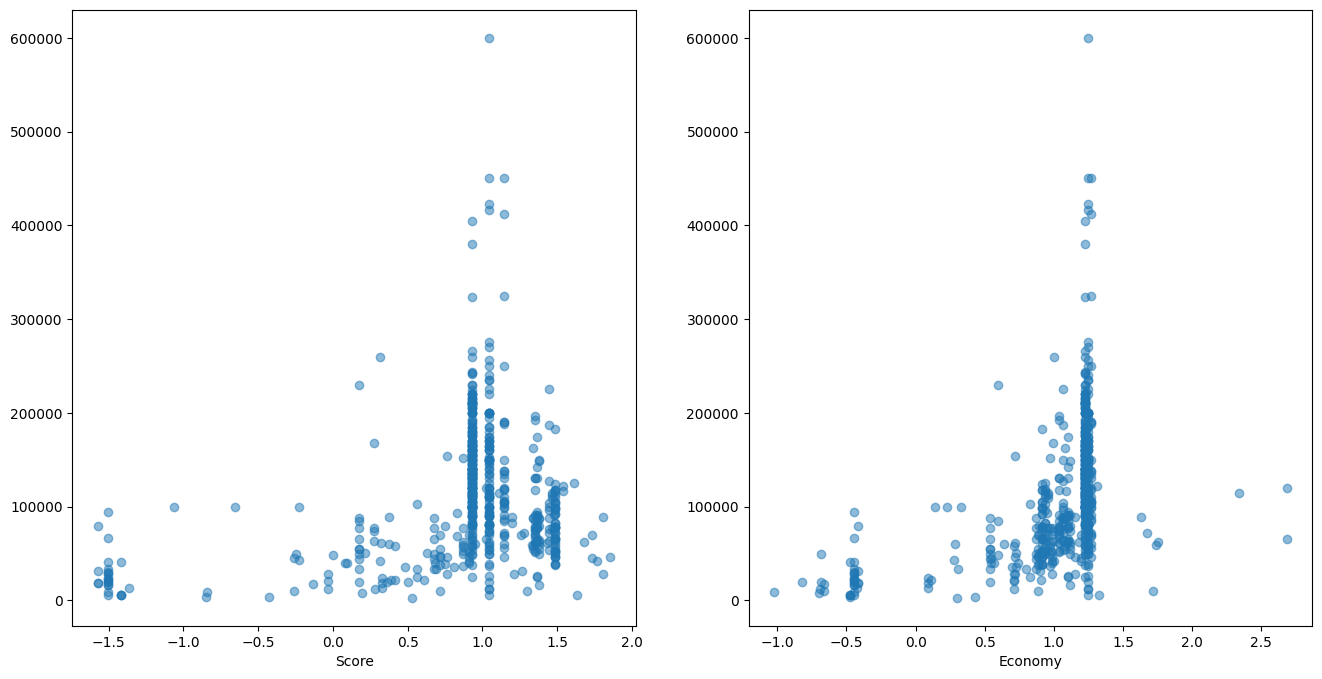

In [10]:
fig, axis = plt.subplots(1, 2, figsize=(16, 8))

axis[0].scatter(df.score, df.salary_in_usd, alpha=0.5)
axis[0].set_xlabel('Score')

axis[1].scatter(df.economy, df.salary_in_usd, alpha=0.5)
axis[1].set_xlabel('Economy')

plt.show()

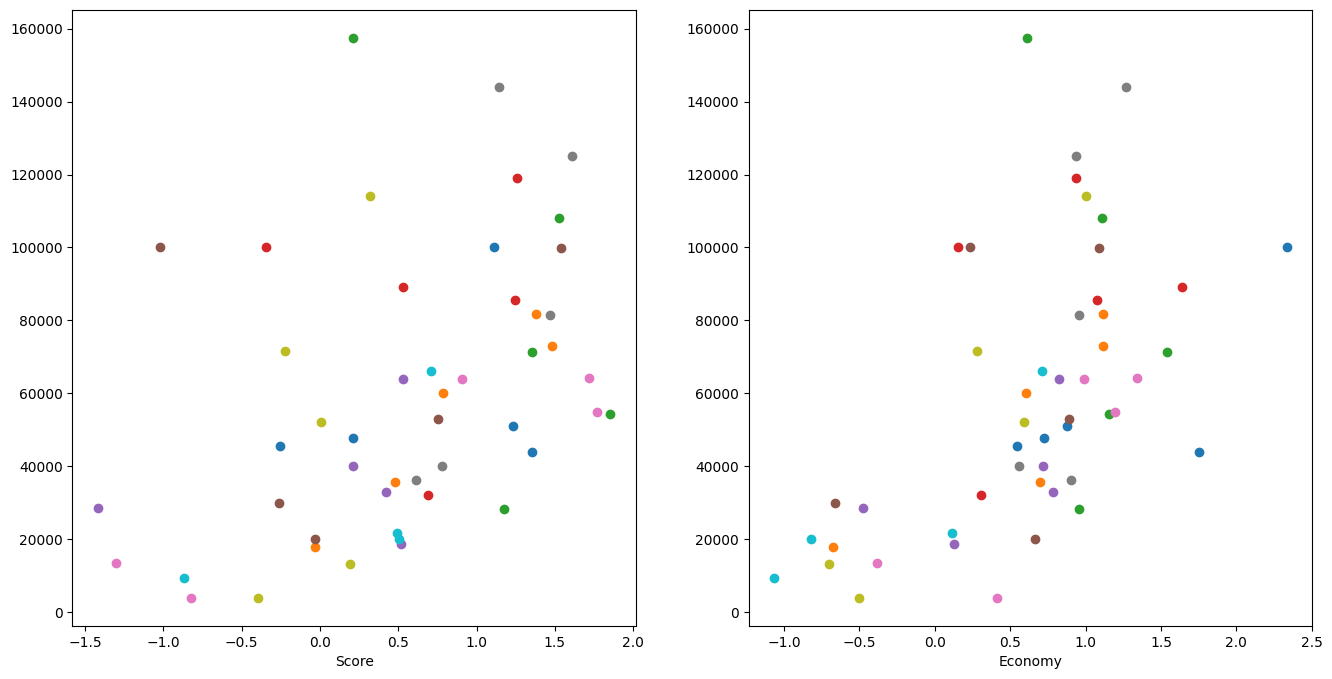

In [11]:
fig, axis = plt.subplots(1, 2, figsize=(16, 8))
for country, mean in df.groupby('company_location')['salary_in_usd'].mean().items():
    axis[0].scatter(scores.loc[country, 'score_2020'], mean)
    axis[1].scatter(scores.loc[country, 'economy_2020'], mean)

axis[0].set_xlabel('Score')
axis[1].set_xlabel('Economy')

plt.show()

In [12]:
from sklearn.decomposition import PCA


for i in range(3):
    pca = PCA(n_components=1)
    pca.fit(scores[[f'score_{2020 + i}', f'economy_{2020 + i}']])
    scores[f'pca_{2020 + i}'] = pca.transform(scores[[f'score_{2020 + i}', f'economy_{2020 + i}']])

scores.head()

         score_2020  economy_2020
country                          
CH         1.716146      1.339579
IS         1.741310      1.166074
DK         1.856055      1.155365
NO         1.847638      1.411638
CA         1.536984      1.087011
...             ...           ...
RW        -1.927966     -1.501305
BJ        -0.425203     -1.421007
SY        -1.612704     -0.836668
BI        -1.685982     -2.346125
TG        -0.888880     -1.784006

[136 rows x 2 columns]
         score_2021  economy_2021
country                          
CH         1.633637      1.328829
IS         1.666359      1.172312
DK         1.804995      1.148817
NO         1.795523      1.383431
CA         1.447641      1.064704
...             ...           ...
RW        -1.919231     -1.459087
BJ        -0.104737     -1.400093
SY        -1.468708     -0.903271
BI        -1.502462     -2.361749
TG        -0.603137     -1.788548

[136 rows x 2 columns]
         score_2022  economy_2022
country                          


,score_2020,score_2021,score_2022,economy_2020,economy_2021,economy_2022,pca_2020,pca_2021,pca_2022
country,,,,,,,,,
CH,1.716146,1.633637,1.539423,1.339579,1.328829,1.314761,-2.160723,-2.094780,-2.018213
IS,1.741310,1.666359,1.578872,1.166074,1.172312,1.175812,-2.055831,-2.007244,-1.947855
DK,1.856055,1.804995,1.738407,1.155365,1.148817,1.139432,-2.129396,-2.088660,-2.034940
NO,1.847638,1.795523,1.728048,1.411638,1.383431,1.351565,-2.304656,-2.247860,-2.177615
CA,1.536984,1.447641,1.348975,1.087011,1.064704,1.039574,-1.855444,-1.776496,-1.688960


In [14]:
def put_pca(row):
    yr = row['work_year']
    country = row['company_location']
    try: 
        return scores.loc[country, f'pca_{yr}']
    except KeyError:
        return np.nan

df['pca'] = df.apply(put_pca, axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,score,economy,pca
No.,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,79833,0,DE,L,1.380062,1.118186,-1.766528
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S,0.318647,1.000214,-0.932576
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M,1.469023,0.958228,-1.716325
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S,0.505163,-0.817978,0.221193
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L,1.146053,1.267207,-1.706432


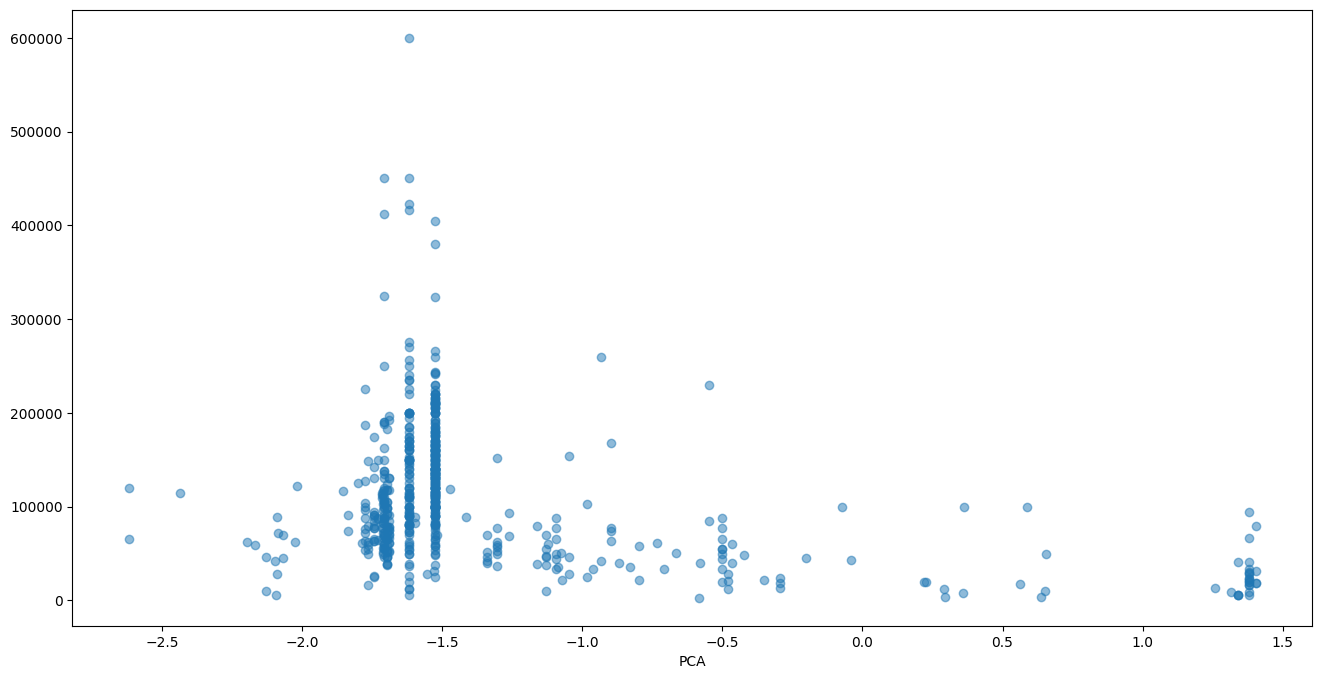

In [16]:
fig = plt.figure(figsize=(16, 8))
plt.scatter(df.pca, df.salary_in_usd, alpha=0.5)
plt.xlabel('PCA')
plt.show()


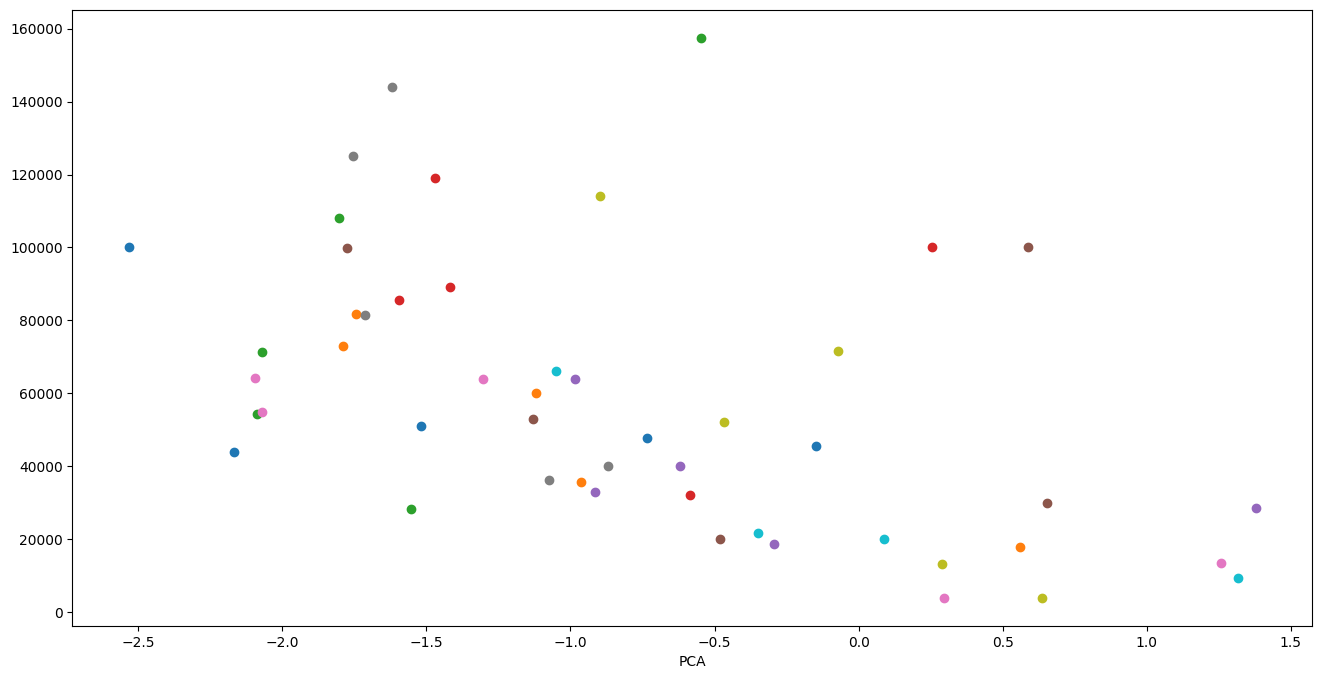

In [17]:
fig = plt.figure(figsize=(16, 8))
for country, mean in df.groupby('company_location')['salary_in_usd'].mean().items():
    plt.scatter(scores.loc[country, 'pca_2021'], mean)
plt.xlabel('PCA')
plt.show()